In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from config import gkey

In [5]:
ultimate_no_null_df = pd.read_csv("ultimate_no_null.csv")
ultimate_no_null_df.head(-10)

,standard_names,month,year,Confirmed,stringency_index,lat,lng,Population (2020),Infection_rate
0,Afghanistan,1,2020,0.0,0.000000,33.939110,67.709953,39074280,0.0000%
1,Afghanistan,2,2020,1.0,2.010690,33.939110,67.709953,39074280,0.0000%
2,Afghanistan,3,2020,174.0,40.831935,33.939110,67.709953,39074280,0.0004%
3,Afghanistan,4,2020,1952.0,80.740000,33.939110,67.709953,39074280,0.0050%
4,Afghanistan,5,2020,13081.0,84.260000,33.939110,67.709953,39074280,0.0335%
...,...,...,...,...,...,...,...,...,...
2019,Zambia,10,2020,1673.0,45.818387,-13.133897,27.849332,18468257,0.0091%
2020,Zambia,11,2020,1215.0,45.370000,-13.133897,27.849332,18468257,0.0066%
2021,Zambia,12,2020,928.0,45.370000,-13.133897,27.849332,18468257,0.0050%
2022,Zimbabwe,1,2020,0.0,1.254194,-19.015438,29.154857,14899771,0.0000%


In [216]:
covid_stats_df = ultimate_no_null_df.groupby(["standard_names", "Population (2020)", "lat", "lng"], as_index= False).agg({"Confirmed" : "sum",
                                                                                      "stringency_index": "mean",
                                                                                      "Infection_rate" : "max"})
covid_stats_df.to_csv("covid_stats_2020.csv")
covid_stats_df.head(-5)

,standard_names,Population (2020),lat,lng,Confirmed,stringency_index,Infection_rate
0,Afghanistan,39074280,33.939110,67.709953,46274.0,42.700514,0.0417%
1,Albania,2877239,41.153332,20.168331,52004.0,55.330056,0.6015%
2,Algeria,43984569,28.033886,1.659626,94371.0,59.981444,0.0574%
3,Andorra,77287,42.506285,1.521801,7519.0,40.286864,3.5012%
4,Angola,33032075,-11.202692,17.873887,16562.0,57.541104,0.0177%
...,...,...,...,...,...,...,...
161,United Kingdom,67948282,55.378051,-3.435973,2173896.0,56.888553,0.9109%
162,United States,331341050,37.090240,-95.712891,17459296.0,56.045880,1.3467%
163,Uruguay,3475842,-32.522779,-55.765835,12451.0,37.664805,0.1753%
164,Uzbekistan,33551824,41.377491,64.585262,75675.0,50.968375,0.0533%


In [268]:
# Define function for calculating linear regression and scatter plot with linear regression plot
def linear_regression(x,y):
    print(f"The correlation coefficient is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, c = "lightblue", edgecolor = "black")
    plt.plot(x,regress_values,"r-")
    plt.grid(alpha = .2)
    return line_eq

# Define a fuction for annotating
def plot_annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="black")

In [219]:
def ln_rg_country(country):
    x = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country]
    y = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country]\
            .str.rstrip('%').astype('float')
    line_eq = linear_regression(x,y)
    a = x.min()
    b = y.max()
    plot_annotate(line_eq, a, b)

In [217]:
def line_plots(country):    
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    num_rcd = len(ultimate_no_null_df.loc[ultimate_no_null_df["standard_names"] == country])
    x_axis= range(1,num_rcd+1)
    tick_locations = [value for value in x_axis]
    y1 = ultimate_no_null_df["Confirmed"].loc[ultimate_no_null_df["standard_names"] == country]
    y2 = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country]
    y3 = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country]\
            .str.rstrip('%').astype('float')
    plt.figure(1, figsize=(12,10))
    plt.subplot(311)
    plt.plot(x_axis, y1, color='orange', linewidth=2, markersize=12, label = "Confirmed")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.xlabel("2020")
    plt.ylabel("Confirmed in millions")
    plt.title(f"{country} Covid confirmed trend for 2020")
    plt.xticks(tick_locations, months, rotation="vertical")
    plt.grid()
    plt.subplot(312)
    plt.plot(x_axis, y2, color='blue', linewidth=2, markersize=12, label = "Stringency")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.ylim(0,100)
    plt.xticks(tick_locations, months, rotation="vertical")
    plt.xlabel("2020")
    plt.ylabel("Stringency Index")
    plt.title(f"{country} law stringency trend for 2020")
    plt.grid()
    plt.subplot(313)
    plt.plot(x_axis, y3, color='red', linewidth=2, markersize=12, label = "Infection rate")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.xticks(tick_locations, months, rotation="vertical")
    plt.xlabel("2020")
    plt.ylabel("Infection rate")
    plt.title(f"{country} infection rate for 2020")
    plt.grid()

    plt.tight_layout()
    plt.show()

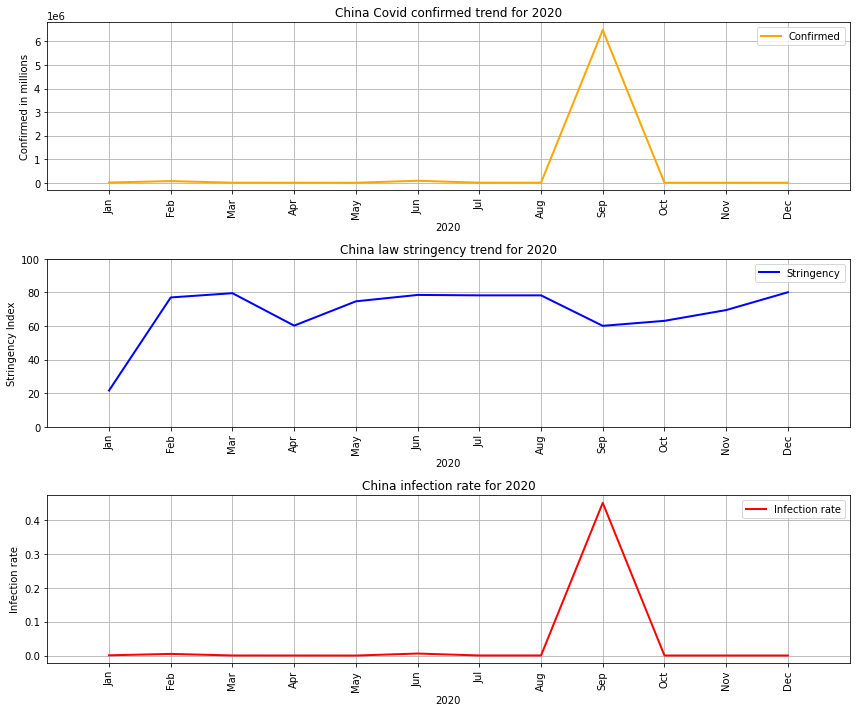

In [218]:
line_plots("China")

The correlation coefficient is : -0.15


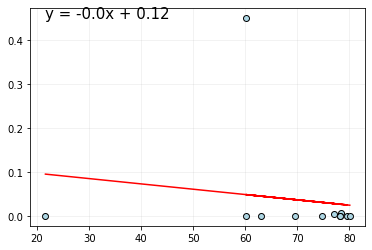

In [269]:
ln_rg_country("China")

In [271]:
country = list(set(ultimate_no_null_df["standard_names"]))
country.sort()
corrcoef = []
p_value = []
r_value = []

for name in range(len(country)):
    x = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country[name]]
    y = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country[name]]\
            .str.rstrip('%').astype('float')
    corrcoef.append(round(st.pearsonr(x, y)[0],2))
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    p_value.append(pvalue)
    r_value.append(rvalue)
    
country_r_value_df = pd.DataFrame({"standard_names" : country,
                                  "corrcoef" : corrcoef,
                                  "p_value" : p_value,
                                  "r_value" : r_value})
country_r_value_df.head(-5)

,standard_names,corrcoef,p_value,r_value
0,Afghanistan,0.63,0.039633,0.625339
1,Albania,0.18,0.579202,0.178340
2,Algeria,0.53,0.077867,0.527671
3,Andorra,0.54,0.069805,0.540212
4,Angola,0.28,0.379685,0.279092
...,...,...,...,...
161,United Kingdom,0.42,0.174277,0.419794
162,United States,0.55,0.064176,0.549571
163,Uruguay,0.29,0.367422,0.286044
164,Uzbekistan,0.22,0.498582,0.216770


In [265]:
x = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == "India"]
y = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == "India"]\
        .str.rstrip('%').astype('float')
print(round(st.pearsonr(x, y)[0],2))
print(round(st.pearsonr(x, y)[1],2))
print(round(np.corrcoef(x,y)[0][1],2))

0.39
0.24
0.39


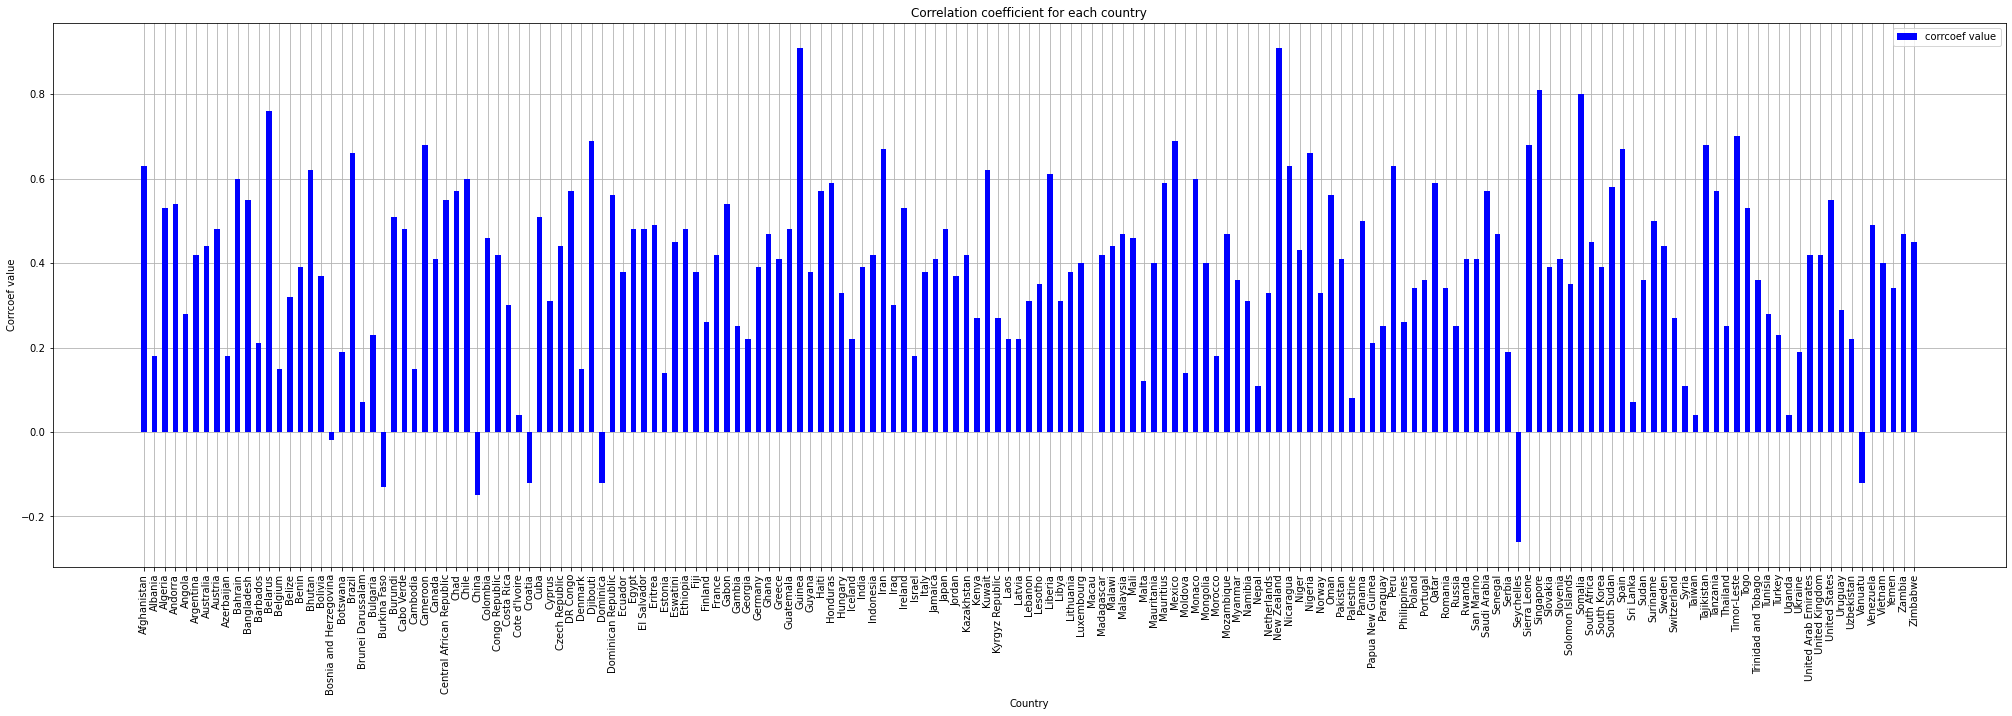

In [272]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(country_r_value_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(35,10))
plt.bar(x_axis, country_r_value_df["corrcoef"], color='blue', align="center", width = 0.52, zorder = 3)
plt.xticks(tick_locations, country, rotation="vertical")

# Set limits for x & y axes
# plt.xlim(-0.55, len(x_axis)-0.45)
# plt.ylim(0, max(country_r_value_df["count"])*1.05)

# Set labels for axes & title for the chart
plt.title("Correlation coefficient for each country")
plt.xlabel("Country")
plt.ylabel("Corrcoef value")

# Creating and displaying legend
column_name = ["corrcoef value"]
plt.legend(column_name,loc="best")
plt.grid(zorder=0)

# Display the plot
# plt.savefig("Images/bar_chart.png")
plt.show()